# Assignment 2 — Noise Removal & Sharpening
This assignment has two main parts:

- **Part A:** Add noise + denoise with multiple filters
- **Part B:** Laplacian and sharpening on multiple images

### Dataset images (place in the same folder as this notebook)
- `bsds300_3096.jpg`
- `bsds300_103041.jpg`
- `bsds300_12003.jpg`


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def _hist(img, bins=256):
    return cv2.calcHist([img],[0],None,[bins],[0,256]).ravel()

def show_img(img, title="", cmap="gray"):
    plt.figure(figsize=(5,4))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_hist(img, title="Histogram"):
    h = _hist(img)
    plt.figure(figsize=(6,3))
    plt.plot(h)
    plt.xlim(0,255)
    plt.title(title)
    plt.show()
    return h

def show_img_hist(img, title_img="", title_hist="Histogram"):
    h = _hist(img)
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
    ax[0].set_title(title_img)
    ax[0].axis("off")
    ax[1].plot(h)
    ax[1].set_xlim(0,255)
    ax[1].set_title(title_hist)
    plt.tight_layout()
    plt.show()
    return h

def show_grid(images, titles, ncols=4, figsize=(16,8)):
    n = len(images)
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
    ax = np.array(ax).reshape(nrows, ncols)

    for i in range(nrows*ncols):
        r, c = divmod(i, ncols)
        ax[r,c].axis("off")
        if i < n:
            ax[r,c].imshow(images[i], cmap="gray", vmin=0, vmax=255)
            ax[r,c].set_title(titles[i])
    plt.tight_layout()
    plt.show()


## Load images

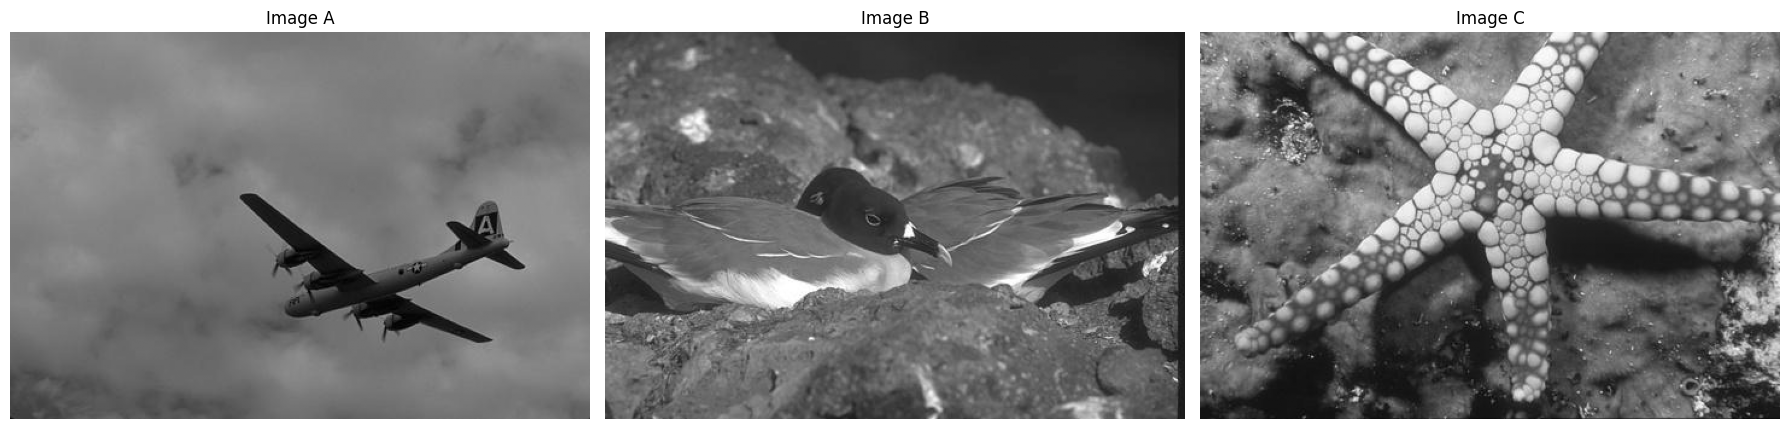

In [2]:
imgA = cv2.imread("images/bsds300_3096.jpg", cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread("images/bsds300_103041.jpg", cv2.IMREAD_GRAYSCALE)
imgC = cv2.imread("images/bsds300_12003.jpg", cv2.IMREAD_GRAYSCALE)
for name, im in [("A", imgA), ("B", imgB), ("C", imgC)]:
    if im is None:
        raise FileNotFoundError(f"Missing bsds300 image {name} (place it next to the notebook).")

show_grid([imgA, imgB, imgC], ["Image A", "Image B", "Image C"], ncols=3, figsize=(18,5))

## Part A — Add noise (Gaussian and Salt&Pepper)

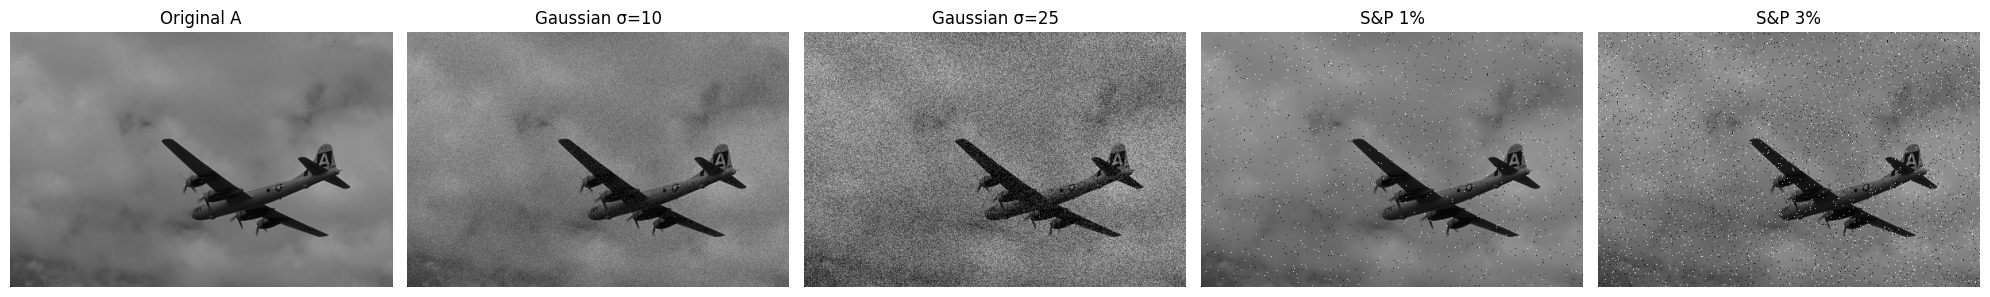

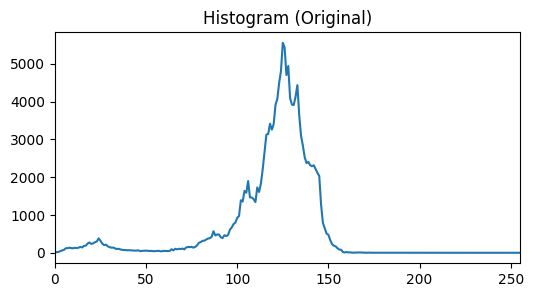

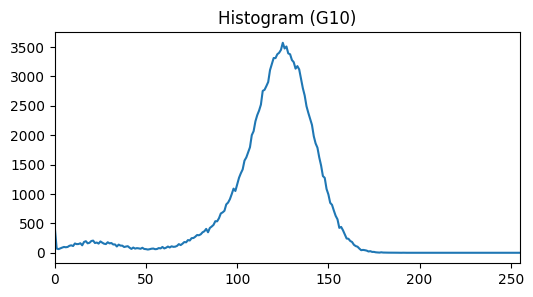

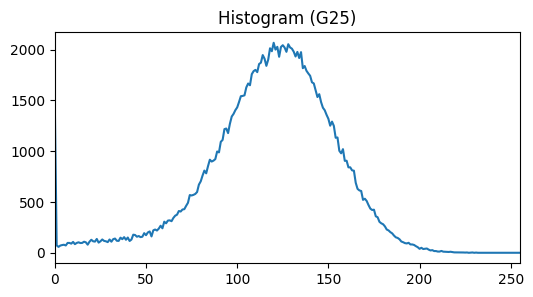

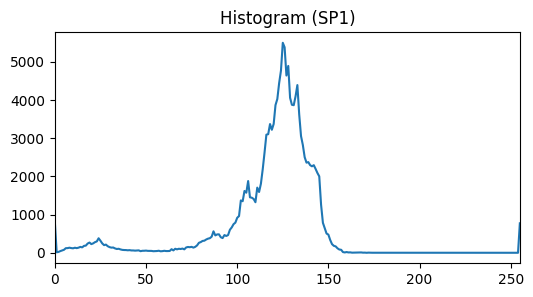

In [ ]:
def add_gaussian(img, sigma, seed=0):
    # TODO
    pass

def add_sp(img, amount, salt_vs_pepper=0.5, seed=0):
    # TODO
    pass

g10 = add_gaussian(imgA, 10, seed=1)
g25 = add_gaussian(imgA, 25, seed=2)
sp1 = add_sp(imgA, 0.01, seed=3)
sp3 = add_sp(imgA, 0.03, seed=4)

show_grid([imgA, g10, g25, sp1, sp3],
          ["Original A", "Gaussian σ=10", "Gaussian σ=25", "S&P 1%", "S&P 3%"],
          ncols=5, figsize=(20,4))

for name, im in [("Original", imgA), ("G10", g10), ("G25", g25), ("SP1", sp1), ("SP3", sp3)]:
    show_hist(im, f"Histogram ({name})")

## Part A — Denoising filters

In [ ]:
def denoise_gaussian_blur(img, k=5):
    # TODO
    pass

def denoise_median(img, k=5):
    # TODO
    pass

def denoise_bilateral(img, d=9, sigmaColor=60, sigmaSpace=60):
    # TODO
    pass

def denoise_nlm(img, h=10):
    # TODO
    pass

cases = [
    ("Gaussian σ=10", g10),
    ("Gaussian σ=25", g25),
    ("S&P 1%", sp1),
    ("S&P 3%", sp3),
]

for cname, noisy in cases:
    outs = [
        noisy,
        denoise_gaussian_blur(noisy, k=3),
        denoise_gaussian_blur(noisy, k=7),
        denoise_median(noisy, k=3),
        denoise_median(noisy, k=5),
        denoise_bilateral(noisy, d=9, sigmaColor=60, sigmaSpace=60),
        denoise_nlm(noisy, h=10),
        denoise_nlm(noisy, h=18),
    ]
    titles = [
        f"{cname} (noisy)",
        "GaussBlur k=3",
        "GaussBlur k=7",
        "Median k=3",
        "Median k=5",
        "Bilateral (9,60,60)",
        "NLM h=10",
        "NLM h=18",
    ]
    show_grid(outs, titles, ncols=4, figsize=(16,8))

## Part B — Laplacian and Sharpening on multiple images

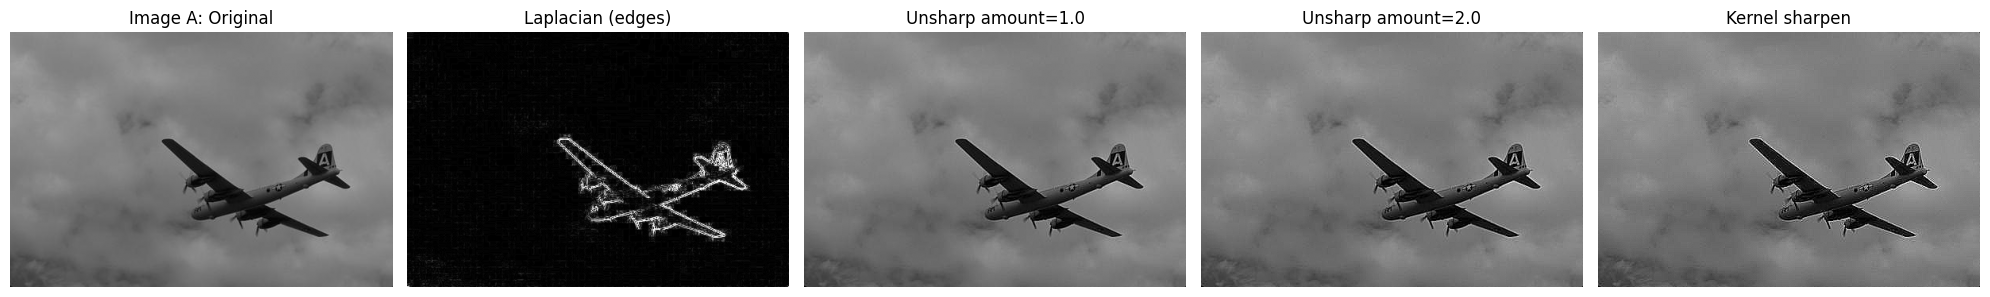

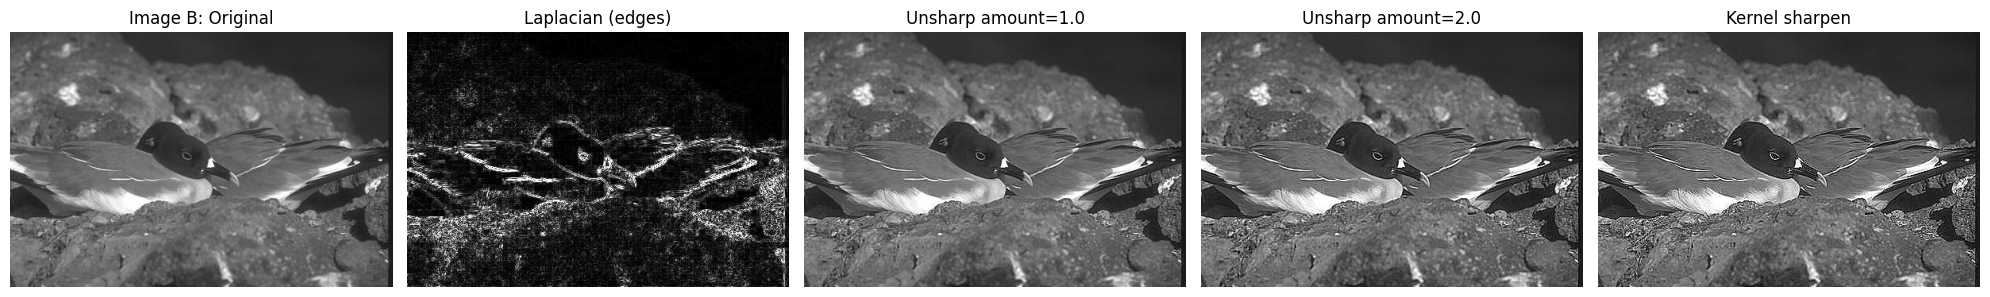

In [ ]:
def laplacian_edges(img, ksize=3):
    # TODO
    pass

def sharpen_unsharp(img, blur_k=5, amount=1.0):
    # TODO
    pass

def sharpen_kernel(img):
    # TODO
    pass


for label, im in [("A", imgA), ("B", imgB), ("C", imgC)]:
    lap = laplacian_edges(im, ksize=3)
    us1 = sharpen_unsharp(im, blur_k=5, amount=1.0)
    us2 = sharpen_unsharp(im, blur_k=5, amount=2.0)
    sk  = sharpen_kernel(im)

    show_grid([im, lap, us1, us2, sk],
              [f"Image {label}: Original", "Laplacian (edges)", "Unsharp amount=1.0", "Unsharp amount=2.0", "Kernel sharpen"],
              ncols=5, figsize=(20,4))

## Analytical questions (short answers)

**Part A — Noise & Denoising**

1. How do Gaussian noise and Salt & Pepper noise differ in their visual appearance and histogram distribution?

2. Why does the median filter generally perform better than Gaussian blur for Salt & Pepper noise?

3. How does increasing the filter strength (kernel size or parameter) affect the trade-off between noise reduction and detail preservation?

---

**Part B — Laplacian**

4. Why is the Laplacian operator highly sensitive to noise?  
   How does image texture level influence the Laplacian output?

---

**Part C — Sharpening**

5. How does Unsharp Mask differ from a fixed sharpening kernel in terms of control and stability?  
   Under what conditions does sharpening introduce halo artifacts?